In [3]:
import pandas as pd

dtypes={'ontime':"category",'location_zipcode':"category"}
df_zipcode_raw= pd.read_csv('boston311.csv',index_col=False,usecols=['ontime','location_zipcode'],dtype=dtypes)
df_zipcode = df_zipcode_raw.dropna()

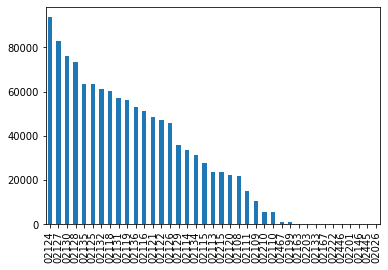

In [4]:
%matplotlib inline
df_zipcode['location_zipcode'].value_counts().plot(kind='bar')

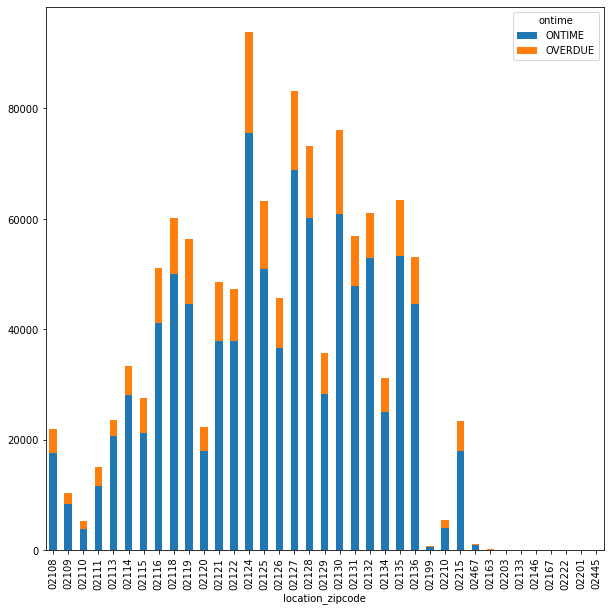

In [44]:
perf_byzipcode=df_zipcode.pivot_table(index='location_zipcode',columns='ontime',aggfunc=len,fill_value=0)
#perf_byzipcode.info()

axes=perf_byzipcode[(perf_byzipcode['ONTIME']>0) & (perf_byzipcode['OVERDUE']>0)].plot.bar(stacked=True,figsize=(10,10))


In [46]:
dtypes={'ontime':"category",'department': "category",'location_zipcode':"category"}

df_pwd_raw= pd.read_csv('boston311.csv',index_col=False,usecols=['ontime','department','location_zipcode'],dtype=dtypes)
df_all=df_pwd_raw.dropna()

In [53]:
#df_pwd=df_all[df_all['department']=='PWDx',['ontime','location_zipcode']]
df_pwd=df_all.loc[ df_all['department']=='PWDx',['ontime','location_zipcode']  ]
#df_pwd.info()
#df_pwd.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729509 entries, 1 to 1556780
Data columns (total 2 columns):
ontime              729509 non-null category
location_zipcode    729509 non-null category
dtypes: category(2)
memory usage: 7.0 MB


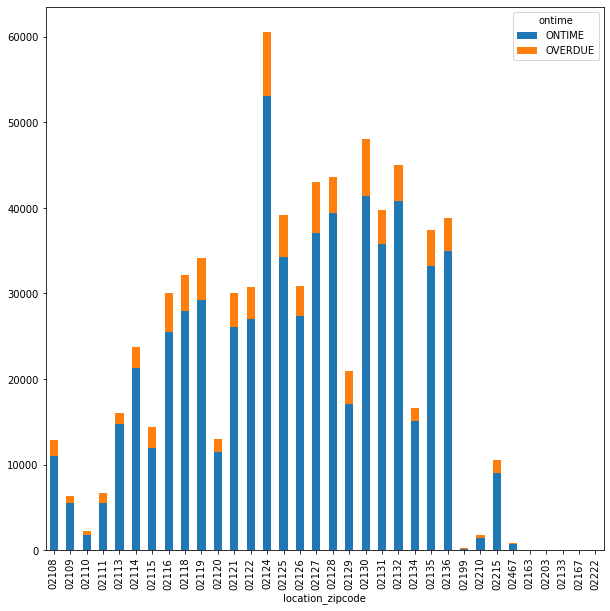

In [55]:
pwdperf=df_pwd.pivot_table(index='location_zipcode',columns='ontime',aggfunc=len,fill_value=0)
pwdperf[(pwdperf['ONTIME']>0) & (pwdperf['OVERDUE']>0)].plot.bar(stacked=True,figsize=(10,10))